In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import metrics

In [2]:
concrete_data = pd.read_excel('/content/Concrete_Data.xls')
concrete_data.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [3]:
concrete_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

In [4]:
concrete_data.isnull().sum()

Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
Concrete compressive strength(MPa, megapascals)          0
dtype: int64

In [5]:
concrete_data.shape

(1030, 9)

In [6]:
concrete_data.describe()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


## **DATA VISUALIZATION**

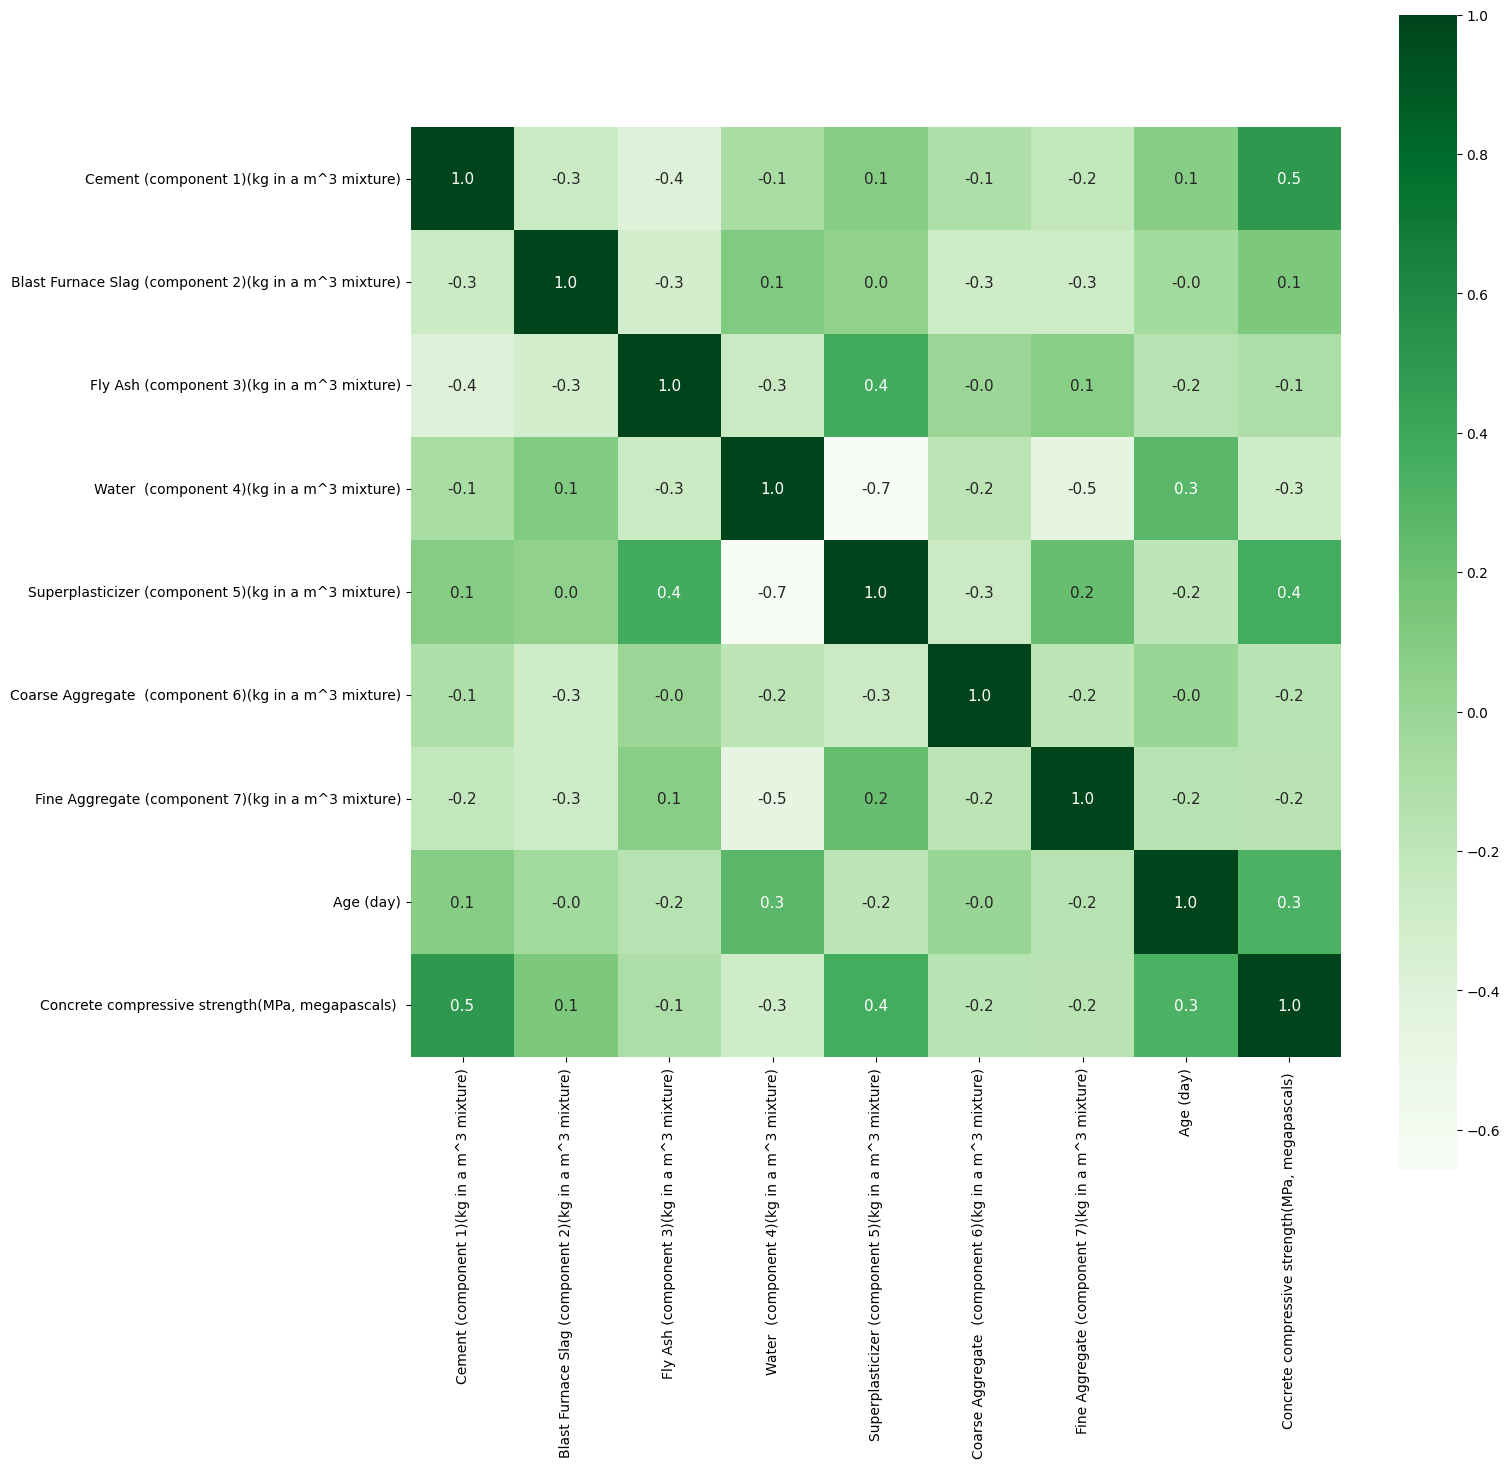

In [7]:
correlation = concrete_data.corr()
plt.figure(figsize=(15,15))
sns.heatmap(correlation, cmap="Greens", annot=True, square=True, fmt='.1f', annot_kws={'size':11}, cbar=True)
plt.show()

<Figure size 1000x1000 with 0 Axes>

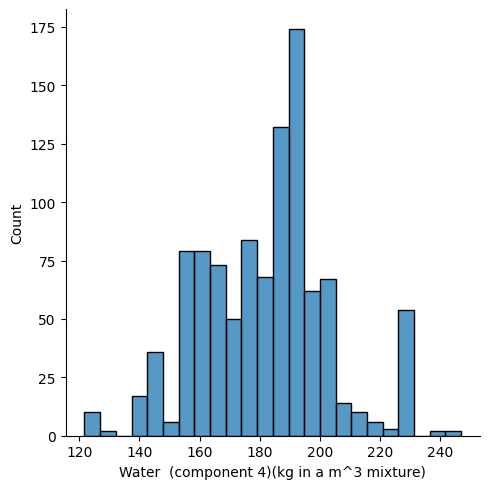

In [8]:
plt.figure(figsize=(10,10))
sns.displot(concrete_data['Water  (component 4)(kg in a m^3 mixture)'])

In [ ]:
print(concrete_data.columns)

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')


<Axes: xlabel='Concrete compressive strength(MPa, megapascals) ', ylabel='Count'>

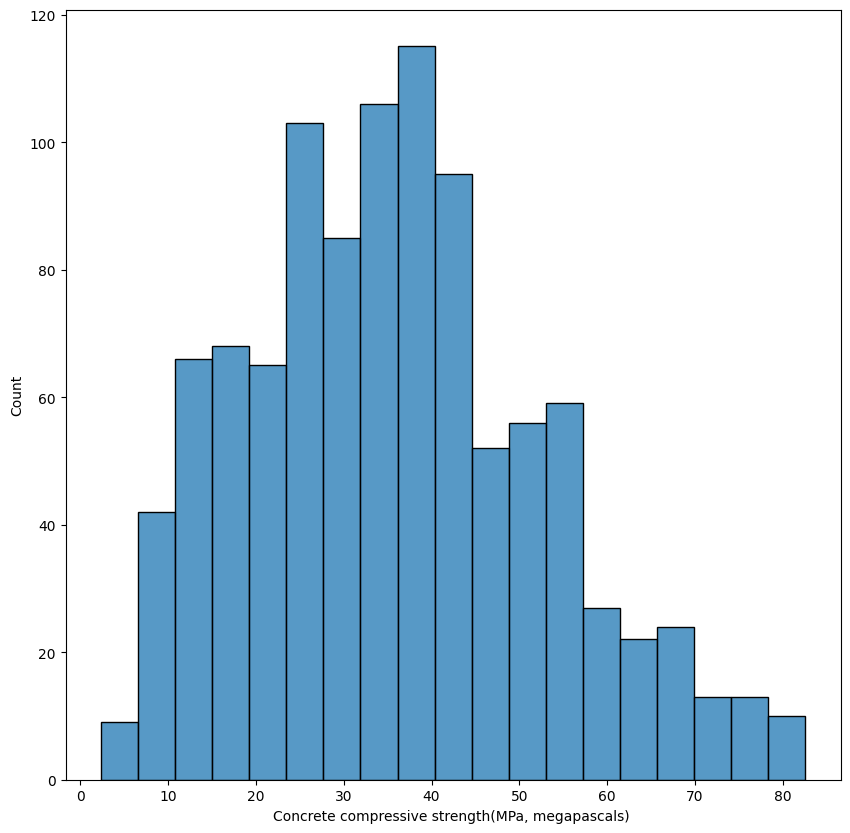

In [9]:
plt.figure(figsize=(10,10))
sns.histplot(concrete_data['Concrete compressive strength(MPa, megapascals) '])

In [10]:
print(correlation['Concrete compressive strength(MPa, megapascals) '])

Cement (component 1)(kg in a m^3 mixture)                0.497833
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0.134824
Fly Ash (component 3)(kg in a m^3 mixture)              -0.105753
Water  (component 4)(kg in a m^3 mixture)               -0.289613
Superplasticizer (component 5)(kg in a m^3 mixture)      0.366102
Coarse Aggregate  (component 6)(kg in a m^3 mixture)    -0.164928
Fine Aggregate (component 7)(kg in a m^3 mixture)       -0.167249
Age (day)                                                0.328877
Concrete compressive strength(MPa, megapascals)          1.000000
Name: Concrete compressive strength(MPa, megapascals) , dtype: float64


<Axes: xlabel='Age (day)', ylabel='count'>

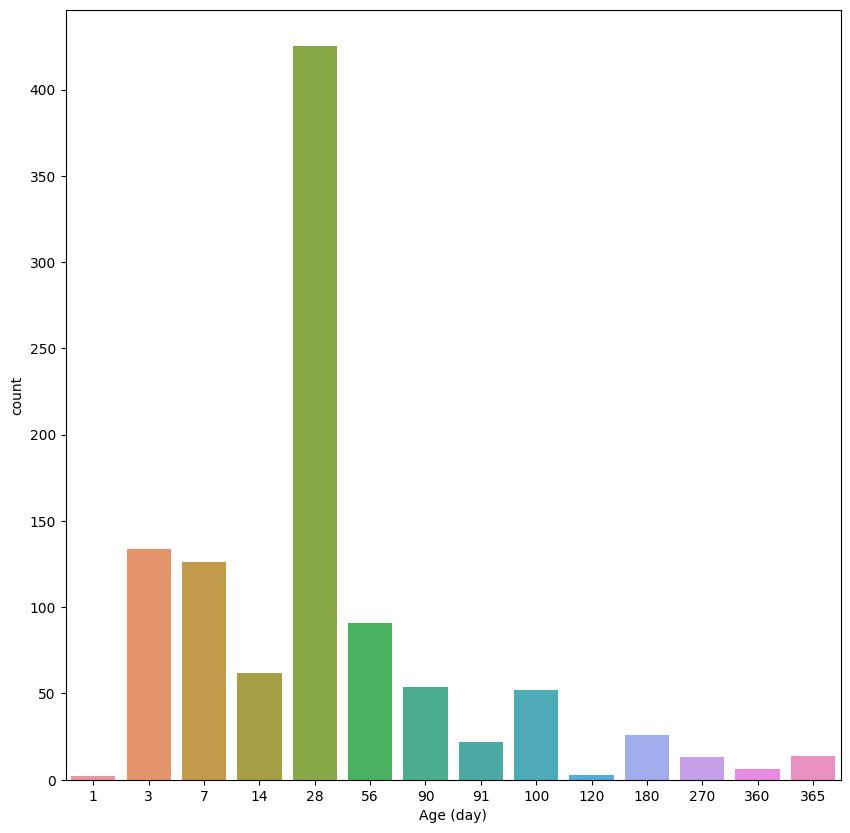

In [11]:
plt.figure(figsize=(10,10))
sns.countplot(x='Age (day)', data=concrete_data)

## **Splitting the Data**

In [12]:
# Target and Feature columns
x = concrete_data.drop(['Concrete compressive strength(MPa, megapascals) '], axis=1)
y = concrete_data['Concrete compressive strength(MPa, megapascals) ']

In [13]:
# Train and Test datasets
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=3, test_size=0.2)

## **Training the Model**

In [14]:
model = LinearRegression()
model2 = XGBRegressor() 

In [15]:
model.fit(x_train, y_train)

LinearRegression()

In [16]:
model2.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

## ***Model Evaluation***

**Linear Regression**

In [19]:
prediction = model.predict(x_train)
r2 = metrics.r2_score(prediction, y_train)
x = metrics.mean_squared_error(prediction, y_train)
y = metrics.mean_absolute_error(prediction, y_train)
z = metrics.mean_absolute_percentage_error(prediction, y_train)
print('Training Evaluation of Linear regression')
print('R Squared  : %s' % r2)
print(f"Mean Absolute Error : {y}")
print(f"Mean Absolute Percentage Error : {z}")
print(f"Mean Squared Error : {x}")

Training Evaluation of Linear regression
R Squared  : 0.39586478407113246
Mean Absolute Error : 8.092888591384241
Mean Absolute Percentage Error : 0.23893236264277135
Mean Squared Error : 103.64996127294252


In [20]:
prediction2 = model.predict(x_test)
r2_2 = metrics.r2_score(prediction2, y_test)
x_2 = metrics.mean_squared_error(prediction2, y_test)
y_2 = metrics.mean_absolute_error(prediction2, y_test)
z_2 = metrics.mean_absolute_percentage_error(prediction2, y_test)
print('Test data Evaluation of Linear regression')
print('R Squared  : %s' % r2_2)
print(f"Mean Absolute Error : {y_2}")
print(f"Mean Absolute Percentage Error : {z_2}")
print(f"Mean Squared Error : {x_2}")

Test data Evaluation of Linear regression
R Squared  : 0.2523043132018167
Mean Absolute Error : 8.901475626079616
Mean Absolute Percentage Error : 0.2589224616377117
Mean Squared Error : 123.24841360321379


**XGBRegressor**

In [22]:
prediction3 = model2.predict(x_train)
r2_3 = metrics.r2_score(prediction3, y_train)
x_3 = metrics.mean_squared_error(prediction3, y_train)
y_3 = metrics.mean_absolute_error(prediction3, y_train)
z_3 = metrics.mean_absolute_percentage_error(prediction3, y_train)
print('Training Evaluation of XGBRegression')
print('R Squared  : %s' % r2_3)
print(f"Mean Absolute Error : {y_3}")
print(f"Mean Absolute Percentage Error : {z_3}")
print(f"Mean Squared Error : {x_3}")

Training Evaluation of XGBRegression
R Squared  : 0.9955840198068707
Mean Absolute Error : 0.37065732384337413
Mean Absolute Percentage Error : 0.012245107902663312
Mean Squared Error : 1.2051993132208014


In [23]:
prediction4 = model2.predict(x_test)
r2_4 = metrics.r2_score(prediction4, y_test)
x_4 = metrics.mean_squared_error(prediction4, y_test)
y_4 = metrics.mean_absolute_error(prediction4, y_test)
z_4 = metrics.mean_absolute_percentage_error(prediction4, y_test)
print('Test data Evaluation of XGBRegression')
print('R Squared  : %s' % r2_4)
print(f"Mean Absolute Error : {y_4}")
print(f"Mean Absolute Percentage Error : {z_4}")
print(f"Mean Squared Error : {x_4}")

Test data Evaluation of XGBRegression
R Squared  : 0.9460411747524152
Mean Absolute Error : 2.497385133893505
Mean Absolute Percentage Error : 0.08866380565267341
Mean Squared Error : 14.956621611274178


## **Comparing the actual values and the predicted values using scatter plots**

In [24]:
y_test = list(y_test)

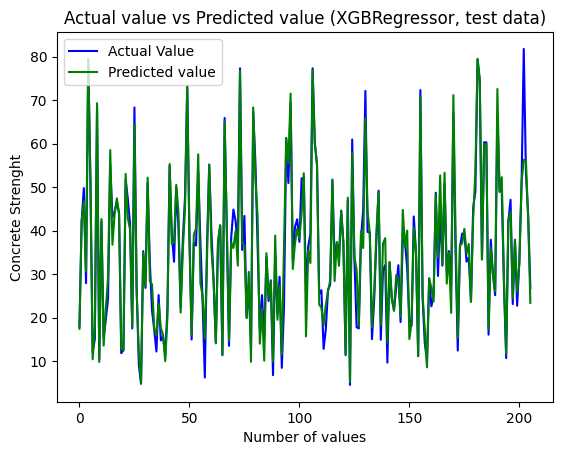

In [26]:
plt.plot(y_test, color='Blue', label='Actual Value')
plt.plot(prediction4, color='Green', label='Predicted value')
plt.title("Actual value vs Predicted value (XGBRegressor, test data)")
plt.xlabel("Number of values")
plt.ylabel("Concrete Strenght")
plt.legend()
plt.show()

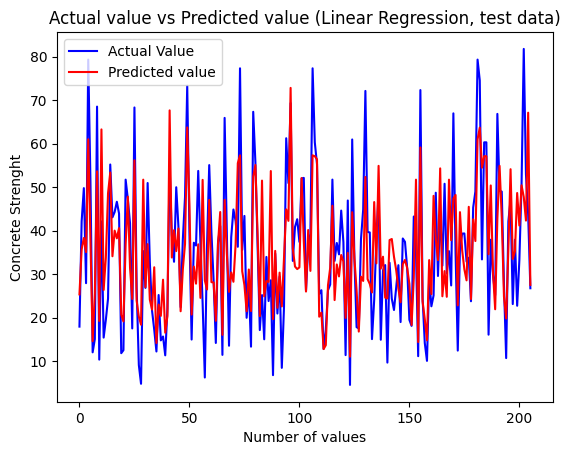

In [28]:
plt.plot(y_test, color='Blue', label='Actual Value')
plt.plot(prediction2, color='Red', label='Predicted value')
plt.title("Actual value vs Predicted value (Linear Regression, test data)")
plt.xlabel("Number of values")
plt.ylabel("Concrete Strenght")
plt.legend()
plt.show()